## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [25]:
# Librerías a utilizar
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
# Importamos pandas
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)

In [26]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [27]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,100.755898,42.122040,19.421080,2058.199951
2015-01-05,97.917427,41.734680,19.093056,2020.579956
2015-01-06,97.926666,41.122128,18.514183,2002.609985
2015-01-07,99.299805,41.644604,18.465944,2025.900024
2015-01-08,103.115128,42.869705,19.160582,2062.139893
...,...,...,...,...
2017-12-22,170.379120,83.112022,194.112244,2683.340088
2017-12-26,166.056595,83.005104,196.269379,2680.500000
2017-12-27,166.085815,83.306412,196.000977,2682.620117


In [28]:
closes.shift(1)

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,100.755898,42.122040,19.421080,2058.199951
2015-01-06,97.917427,41.734680,19.093056,2020.579956
2015-01-07,97.926666,41.122128,18.514183,2002.609985
2015-01-08,99.299805,41.644604,18.465944,2025.900024
...,...,...,...,...
2017-12-22,170.379120,83.102303,194.728546,2684.570068
2017-12-26,170.379120,83.112022,194.112244,2683.340088
2017-12-27,166.056595,83.005104,196.269379,2680.500000


In [29]:
Rall = ((closes-closes.shift(1))/closes.shift(1)).iloc[1:]
Rall

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
2015-01-09,0.001072,-0.008405,0.004029,-0.008404
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001368,0.000791


Ya está implementada la fórmula para obtener cambios porcentuales

In [30]:
Rall1 = closes.pct_change(1).iloc[1:]
Rall1

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
2015-01-09,0.001072,-0.008405,0.004029,-0.008404
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001368,0.000791


y la gráfica de los mismos se puede obtener como

<IPython.core.display.Javascript object>


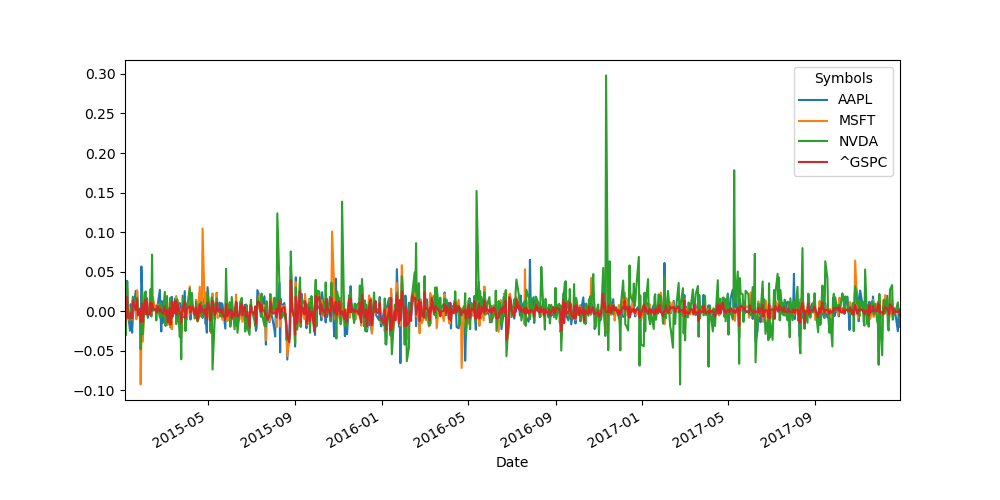

In [31]:
Rall.plot(figsize=(10,5))
plt.show()

Donde se observa que el rendimiento tiene una tendencia mas o menos constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

In [32]:
rall = np.log(closes/closes.shift(1)).iloc[1:]
rall

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-05,-0.028576,-0.009239,-0.017034,-0.018447
2015-01-06,0.000094,-0.014786,-0.030788,-0.008933
2015-01-07,0.013925,0.012625,-0.002609,0.011563
2015-01-08,0.037703,0.028994,0.036927,0.017730
2015-01-09,0.001072,-0.008441,0.004021,-0.008439
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003170,-0.000458
2017-12-26,-0.025697,-0.001287,0.011052,-0.001059
2017-12-27,0.000176,0.003623,-0.001368,0.000791


Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

<IPython.core.display.Javascript object>


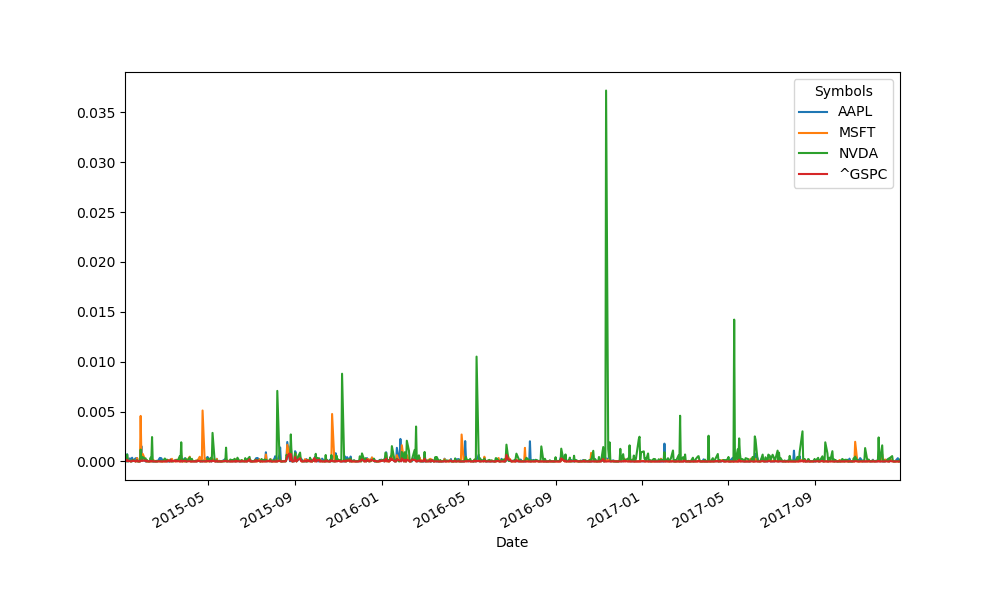

In [33]:
np.abs(rall-Rall).plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [35]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [36]:
msftAC = closes['MSFT']
msftAC

Date
2015-01-02    42.122040
2015-01-05    41.734680
2015-01-06    41.122128
2015-01-07    41.644604
2015-01-08    42.869705
                ...    
2017-12-22    83.112022
2017-12-26    83.005104
2017-12-27    83.306412
2017-12-28    83.316124
2017-12-29    83.141182
Name: MSFT, Length: 755, dtype: float64

In [37]:
Rmsft = simple_daily_ret(msftAC)
Rmsft

Date
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
2015-01-09   -0.008405
                ...   
2017-12-22    0.000117
2017-12-26   -0.001286
2017-12-27    0.003630
2017-12-28    0.000117
2017-12-29   -0.002100
Name: MSFT, Length: 754, dtype: float64

In [38]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


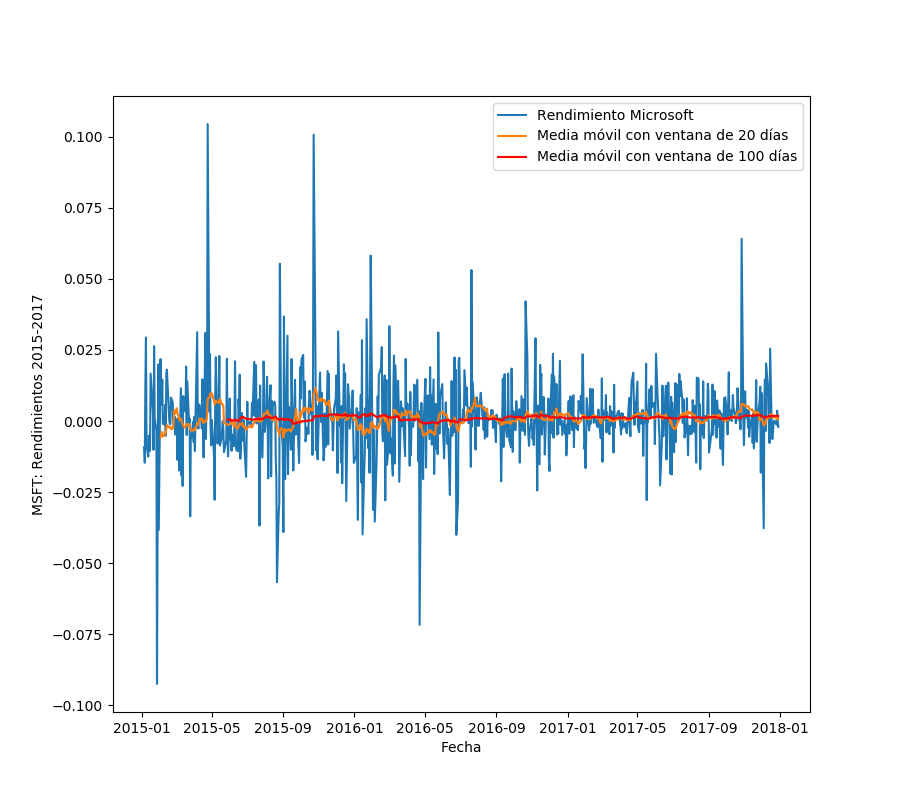

In [41]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

<IPython.core.display.Javascript object>


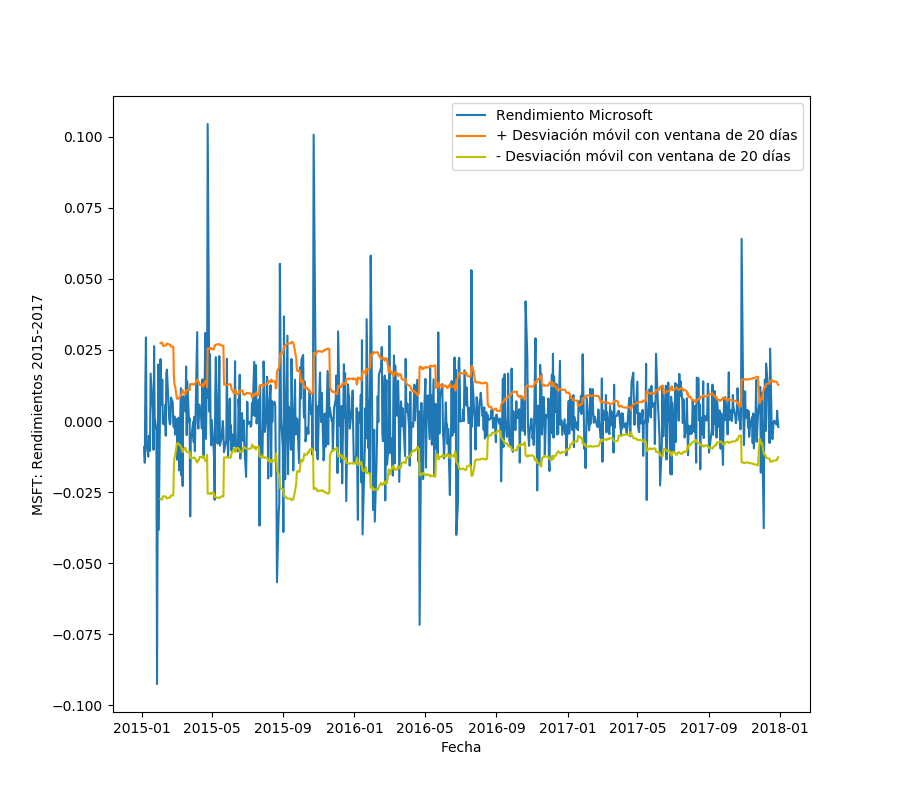

In [16]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

<IPython.core.display.Javascript object>


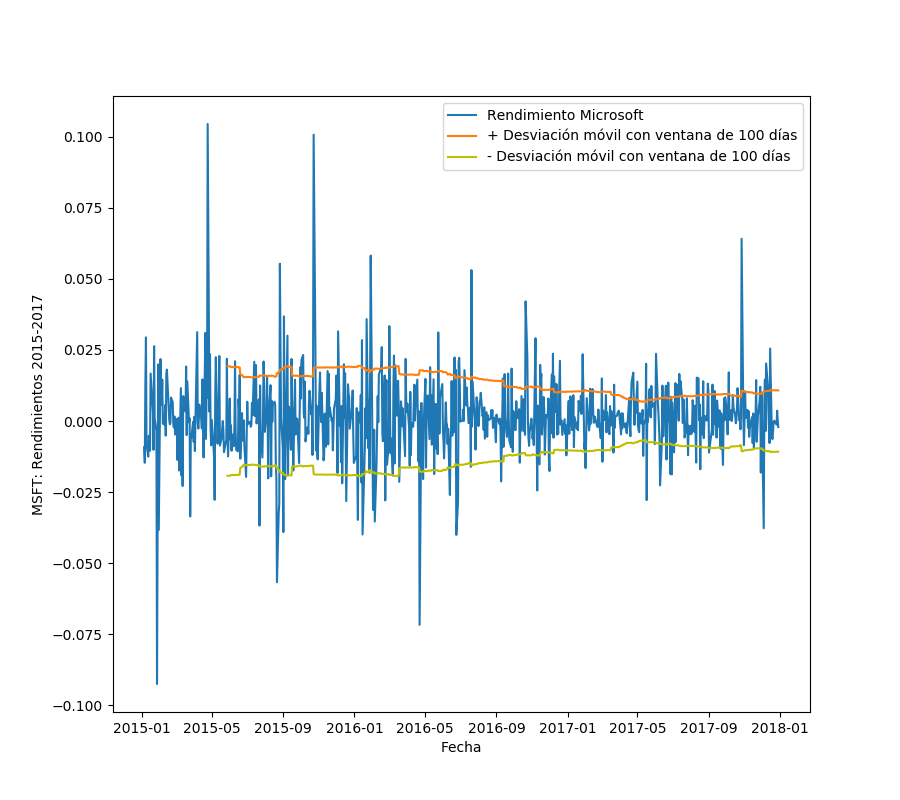

In [43]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

In [19]:
%matplotlib inline

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

<IPython.core.display.Javascript object>


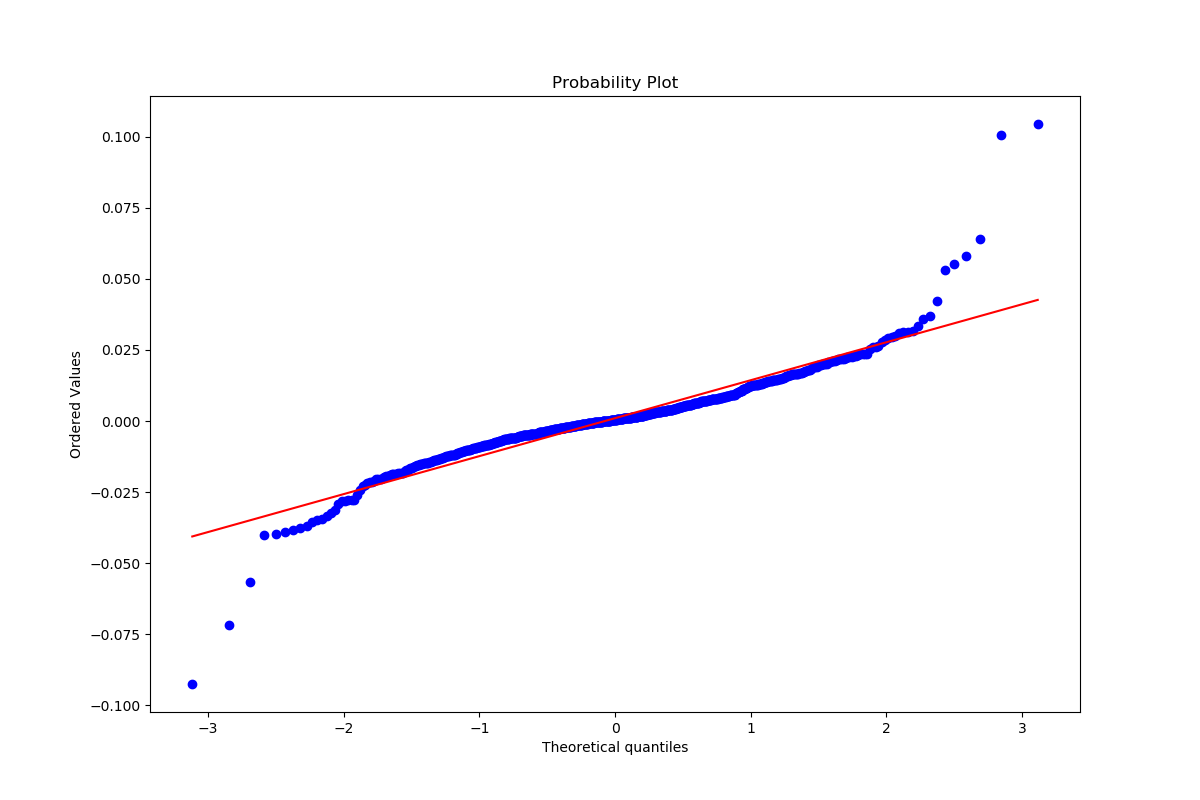

In [44]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

<IPython.core.display.Javascript object>


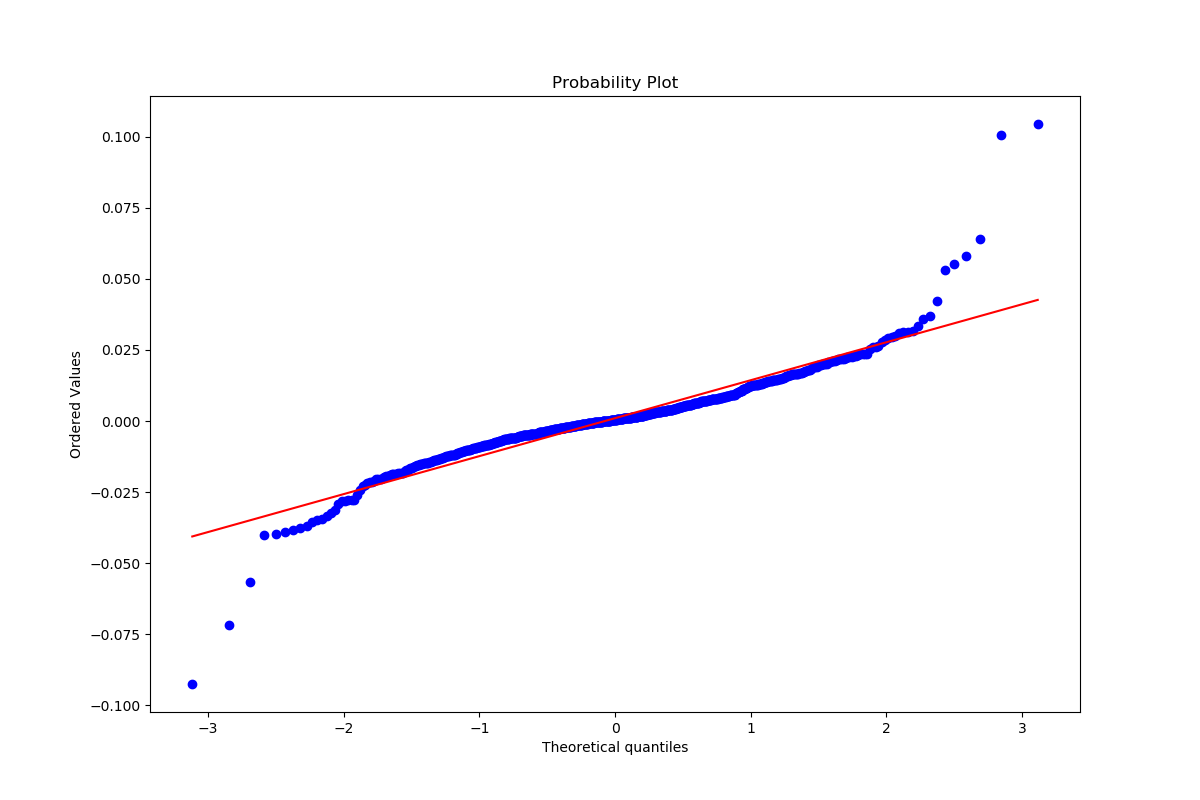

In [46]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [21]:
!python -m pip install seaborn

In [22]:
import seaborn as sns
%matplotlib notebook

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

<IPython.core.display.Javascript object>


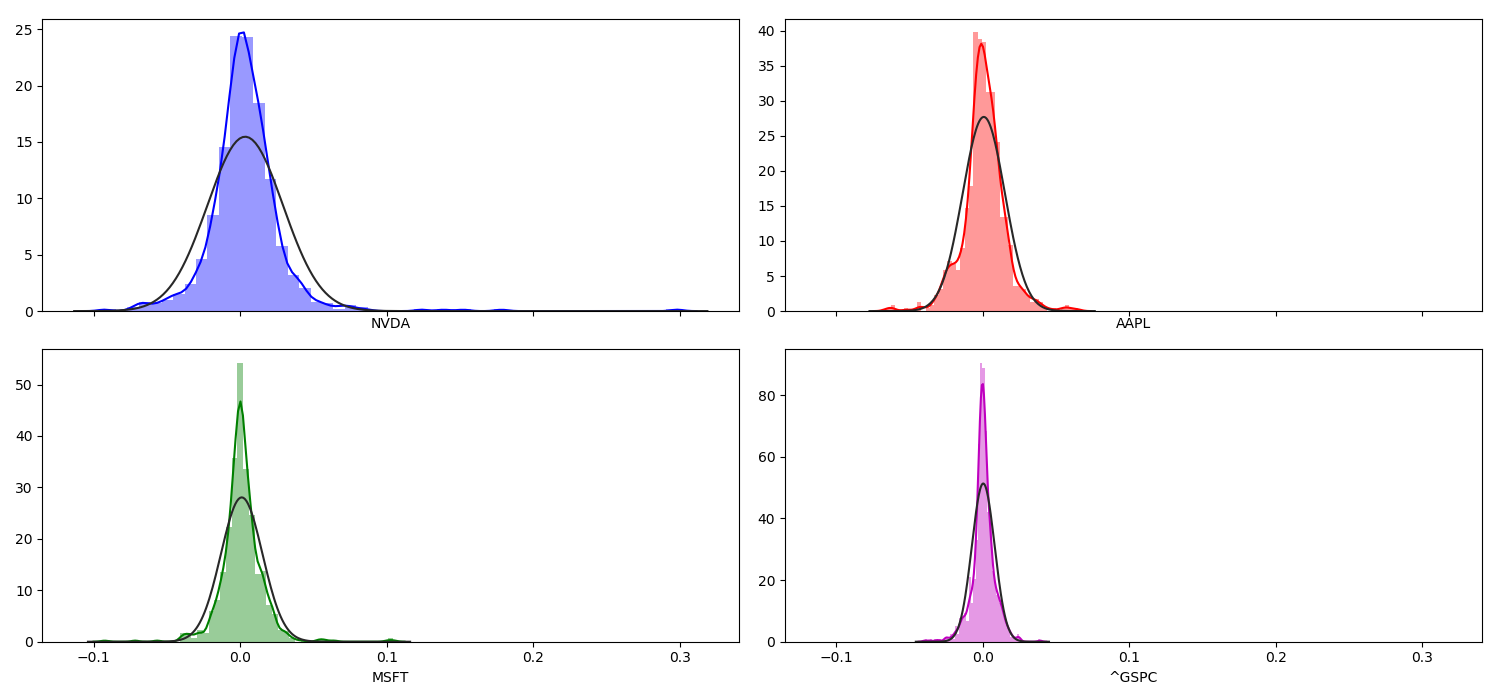

In [23]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

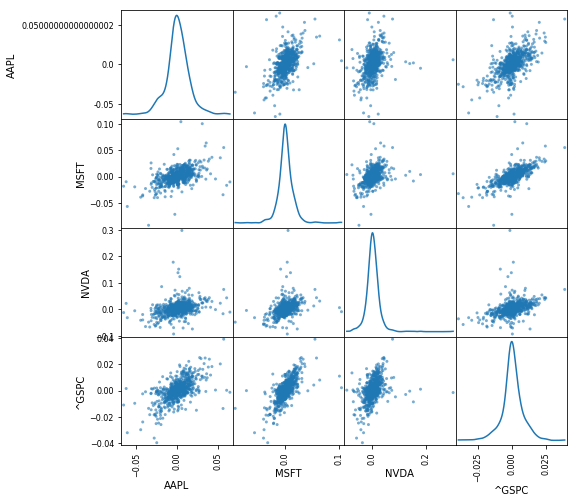

In [46]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.6, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

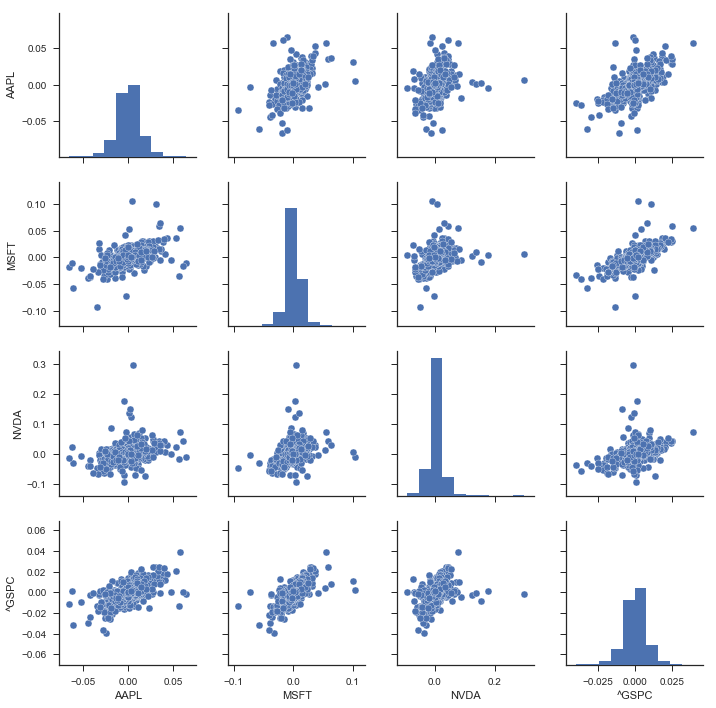

In [47]:
sns.set(style="ticks")
sns.pairplot(Rall);

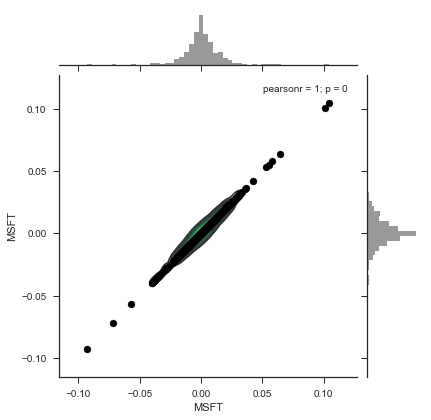

In [48]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

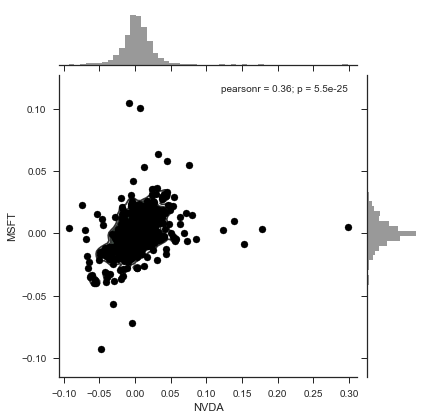

In [49]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

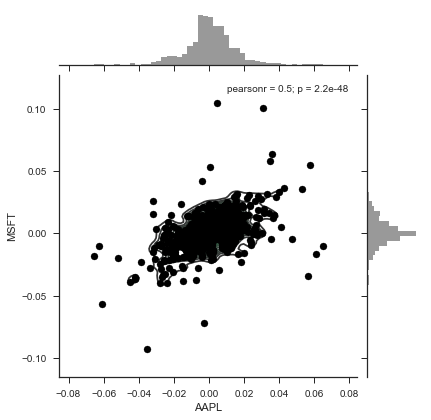

In [67]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

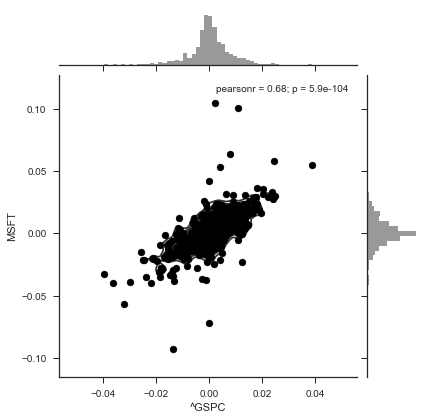

In [68]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [50]:
Rall.corr()

Symbols,AAPL,MSFT,NVDA,^GSPC
Symbols,,,,
AAPL,1.000000,0.497450,0.328940,0.602271
MSFT,0.497450,1.000000,0.363637,0.681244
NVDA,0.328940,0.363637,1.000000,0.397680
^GSPC,0.602271,0.681244,0.397680,1.000000


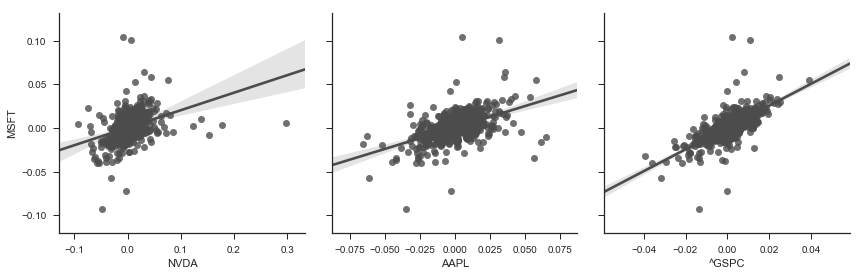

In [52]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["NVDA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");

## Kernel Density Estimation 
https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar Jaramillo Z.
</footer>